## Project

**Data**

* date: Date in format dd/mm/yyyy
* time: time in format hh:mm:ss
* global_active_power: household global minute-averaged active power (in kilowatt)
* global_reactive_power: household global minute-averaged reactive power (in kilowatt)
* voltage: minute-averaged voltage (in volt)
* global_intensity: household global minute-averaged current intensity (in ampere)
* sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
* sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
* sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### Importing Libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
#import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


### Reading the dataset

In [2]:
df = pd.read_csv("Desktop/Python/Time_series_analysis/household_power_consumption.txt", sep=';')

### Overview of the dataset

**view the first (5), last (5) and (10) random rows of the dataset**

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
np.random.seed(1)
df.sample(n=10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2042128,3/11/2010,20:52:00,1.47,0.16,241.73,6.0,0.0,1.0,1.0
1025196,27/11/2008,16:00:00,0.662,0.000,241.480,3.400,0.000,0.000,0.0
1859043,29/6/2010,17:27:00,0.752,0.320,240.040,3.400,0.000,1.000,0.0
202102,6/5/2007,01:46:00,0.150,0.000,237.860,0.600,0.000,0.000,0.0
640490,5/3/2008,12:14:00,0.218,0.000,243.240,0.800,0.000,0.000,0.0
1088456,10/1/2009,14:20:00,0.904,0.064,246.800,3.800,0.000,0.000,0.0
610173,13/2/2008,10:57:00,3.566,0.050,237.350,15.000,39.000,0.000,18.0
291331,7/7/2007,00:55:00,2.518,0.276,240.950,10.400,0.000,20.000,17.0
926702,20/9/2008,06:26:00,0.260,0.148,241.680,1.200,0.000,0.000,1.0
176833,18/4/2007,12:37:00,2.664,0.292,237.370,11.200,39.000,0.000,0.0


In [5]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the data set.")

There are 2075259 rows and 9 columns in the data set.


#### Missing values

In [7]:
df.isnull().sum().sort_values(ascending=False)

Sub_metering_3           25979
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
dtype: int64

In [8]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Date                     0.00
Time                     0.00
Global_active_power      0.00
Global_reactive_power    0.00
Voltage                  0.00
Global_intensity         0.00
Sub_metering_1           0.00
Sub_metering_2           0.00
Sub_metering_3           1.25
dtype: float64

**Duplicated Values**

In [9]:
df.duplicated().sum()

0

In [10]:
df[df.duplicated()].count()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

**Unique Values**

In [11]:
# checking the number of unique values in each column
df.nunique()

Date                     1442
Time                     1440
Global_active_power      6534
Global_reactive_power     896
Voltage                  5168
Global_intensity          377
Sub_metering_1            153
Sub_metering_2            145
Sub_metering_3             32
dtype: int64

In [12]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [14]:
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [15]:
# Convert the "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

In [16]:
# Combine the "Date" and "Time" columns while replacing "/" with "-"
df["DateTime"] = df["Date"].dt.strftime("%d-%m-%Y") + " " + df["Time"]

# Convert the combined column to datetime64 data type
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [17]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 158.3+ MB


In [19]:
df['DateTime'].min() # this will display the date from which data observations have been started

Timestamp('2006-12-16 17:24:00')

In [20]:
df['DateTime'].max() # this will display the last date of the dataset

Timestamp('2010-12-11 23:59:00')

In [21]:
# Extracting date parts from pickup date
df['year'] = df.DateTime.dt.year # extracting the year from the date
df['month'] = df.DateTime.dt.month_name() # extracting the month name from the date
df['hour'] = df.DateTime.dt.hour # extracting the hour from the time
df['day'] = df.DateTime.dt.day # extracting the day from the date
df['week_day'] = df.DateTime.dt.day_name() # extracting the day of the week from the date

In [22]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,year,month,hour,day,week_day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,December,17,16,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,December,17,16,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,December,17,16,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,December,17,16,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,December,17,16,Saturday


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
 10  year                   int64         
 11  month                  object        
 12  hour                   int64         
 13  day                    int64         
 14  week_day               object        
dtypes: datetime64[ns](2), float64(7), int64(3), object(3)
memory usage: 237.5+ MB


In [24]:
for i in df.columns:
    print(i)
    print(df[i].value_counts(ascending = False, normalize = True, dropna = False)*100)
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
    print(f'\n')
    

Date
2008-12-06    0.069389
2009-08-09    0.069389
2009-08-07    0.069389
2009-08-06    0.069389
2009-08-05    0.069389
                ...   
2008-04-05    0.069389
2008-04-04    0.069389
2010-11-24    0.069389
2010-11-26    0.060860
2006-12-16    0.019082
Name: Date, Length: 1442, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


Time
17:24:00    0.069485
19:55:00    0.069485
19:44:00    0.069485
19:45:00    0.069485
19:46:00    0.069485
              ...   
03:47:00    0.069437
03:46:00    0.069437
03:45:00    0.069437
03:44:00    0.069437
17:23:00    0.069437
Name: Time, Length: 1440, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


Global_active_power
NaN      1.251844
0.218    0.460906
0.216    0.451173
0.322    0.450546
0.324    0.448330
           ...   
7.094    0.000048
7.930    0.000048
8.274    0.000048
8.246    0.000048
8.600    0.000048
Name: Global_active_power, Length: 4187, dtype: float64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [25]:
df.describe(include='all').T 
# Let's look at the statistical summary of the data

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,2075259,1442,2008-12-06 00:00:00,1440,2006-12-16 00:00:00,2010-11-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,2075259,1440,17:24:00,1442,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_active_power,2049280.0,NaN,NaN,NaN,NaT,NaT,1.091615,1.057294,0.076,0.308,0.602,1.528,11.122
Global_reactive_power,2049280.0,NaN,NaN,NaN,NaT,NaT,0.123714,0.112722,0.0,0.048,0.1,0.194,1.39
Voltage,2049280.0,NaN,NaN,NaN,NaT,NaT,240.839858,3.239987,223.2,238.99,241.01,242.89,254.15
Global_intensity,2049280.0,NaN,NaN,NaN,NaT,NaT,4.627759,4.444396,0.2,1.4,2.6,6.4,48.4
Sub_metering_1,2049280.0,NaN,NaN,NaN,NaT,NaT,1.121923,6.153031,0.0,0.0,0.0,0.0,88.0
Sub_metering_2,2049280.0,NaN,NaN,NaN,NaT,NaT,1.29852,5.822026,0.0,0.0,0.0,1.0,80.0
Sub_metering_3,2049280.0,NaN,NaN,NaN,NaT,NaT,6.458447,8.437154,0.0,0.0,1.0,17.0,31.0
DateTime,2075259,2075259,2006-12-16 17:24:00,1,2006-12-16 17:24:00,2010-12-11 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

### Univariate Alanysis

**Functions to carry out the Exploratory Data Analysis**

In [26]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

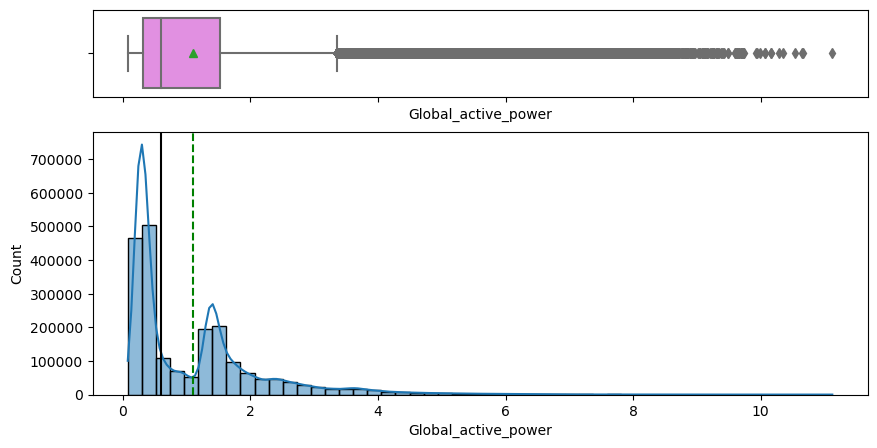

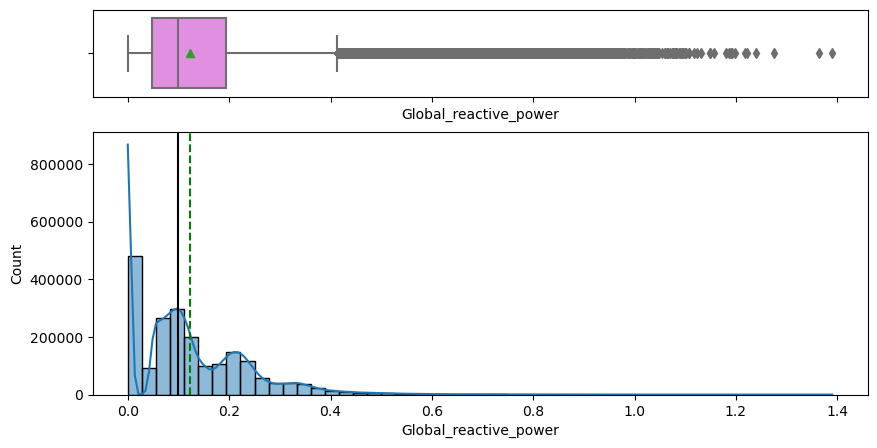

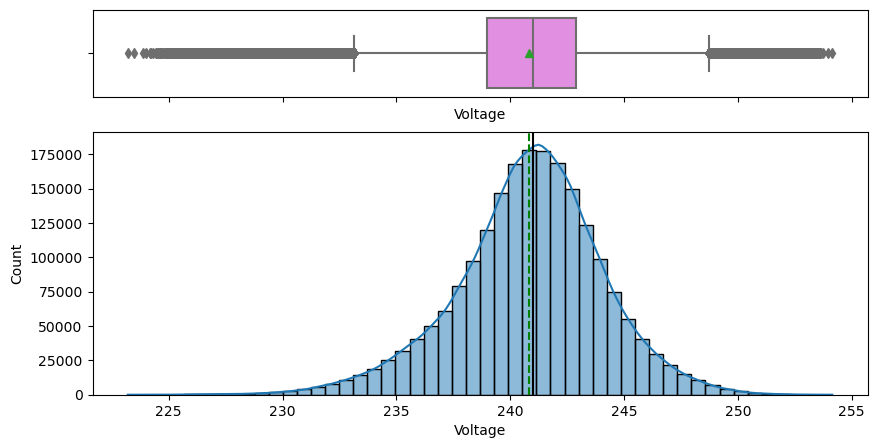

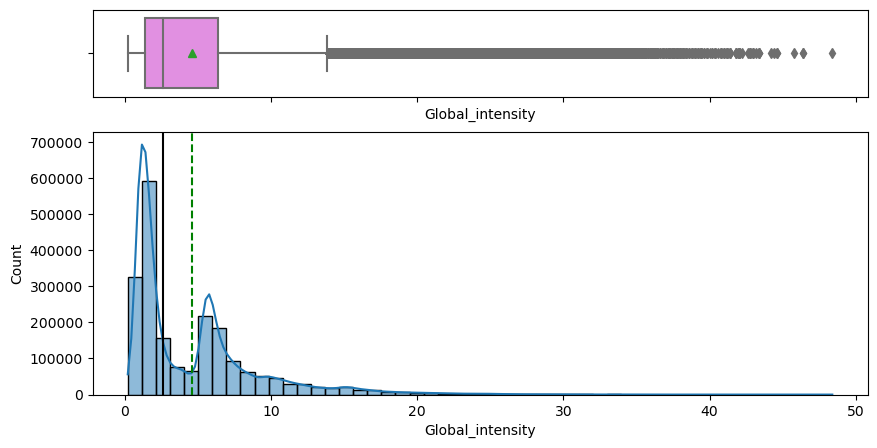

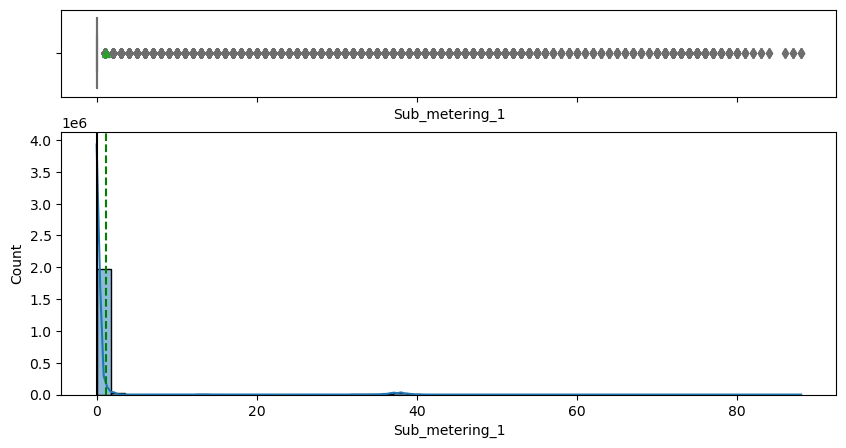

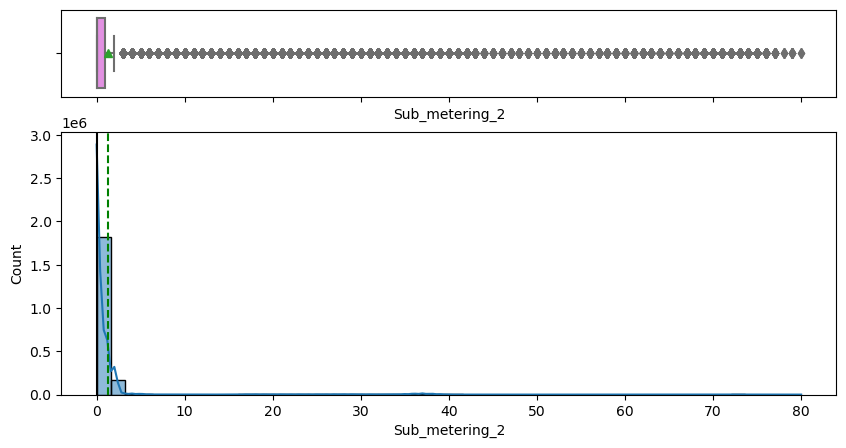

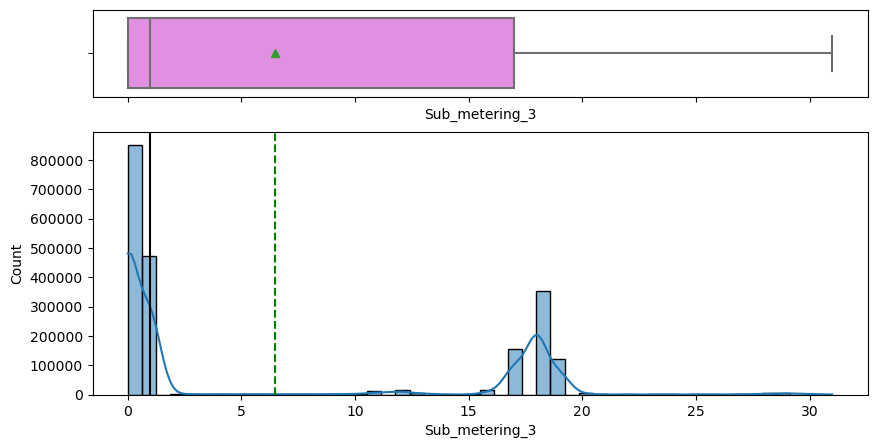

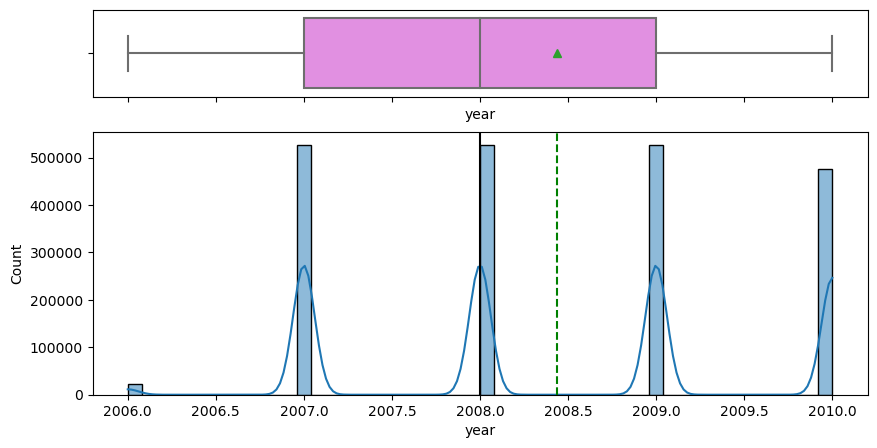

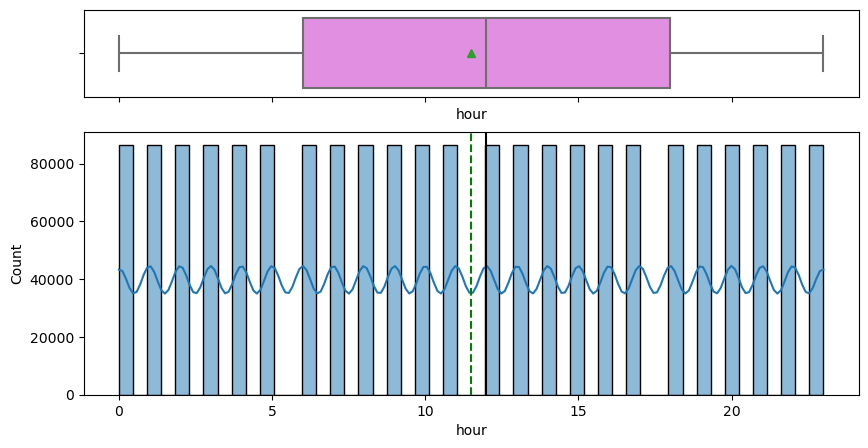

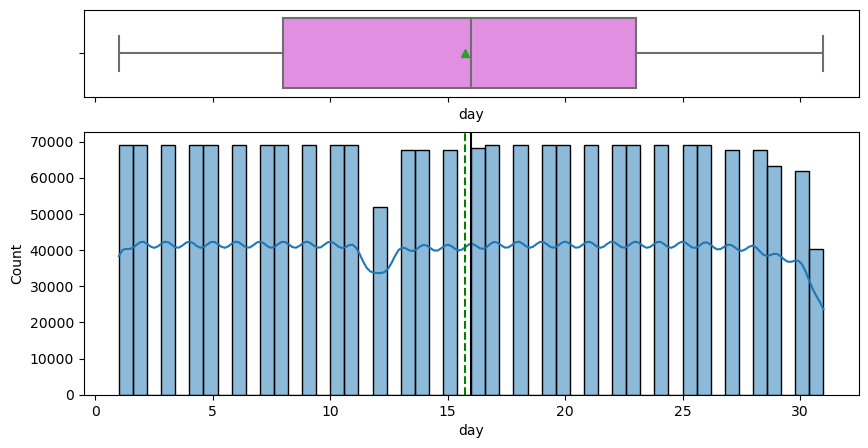

In [28]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

### Bivariate Alanysis

**Functions to carry out the Exploratory Data Analysis**

In [29]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [30]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [31]:
#stacked_barplot(df, "Global_active_power", "Sub_metering_1")

In [32]:
#stacked_barplot(df, "Global_active_power", "Sub_metering_2")

In [33]:
#stacked_barplot(df, "Global_active_power", "Sub_metering_3")

In [34]:
#stacked_barplot(df, "Global_active_power", "Voltage")

In [35]:
#stacked_barplot(df, "Global_active_power", "Global_reactive_power")

In [36]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,hour,day
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,-0.034328,0.281602,-0.012719
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.047018,0.127892,0.006349
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,0.254623,-0.176050,0.002248
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,-0.038621,0.281972,-0.012643
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,-0.012557,0.108491,-0.007821
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,-0.035939,0.087210,0.001196
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.062396,0.113873,-0.012368
year,-0.034328,0.047018,0.254623,-0.038621,-0.012557,-0.035939,0.062396,1.000000,-0.000696,-0.035325
hour,0.281602,0.127892,-0.176050,0.281972,0.108491,0.087210,0.113873,-0.000696,1.000000,-0.000143
day,-0.012719,0.006349,0.002248,-0.012643,-0.007821,0.001196,-0.012368,-0.035325,-0.000143,1.000000


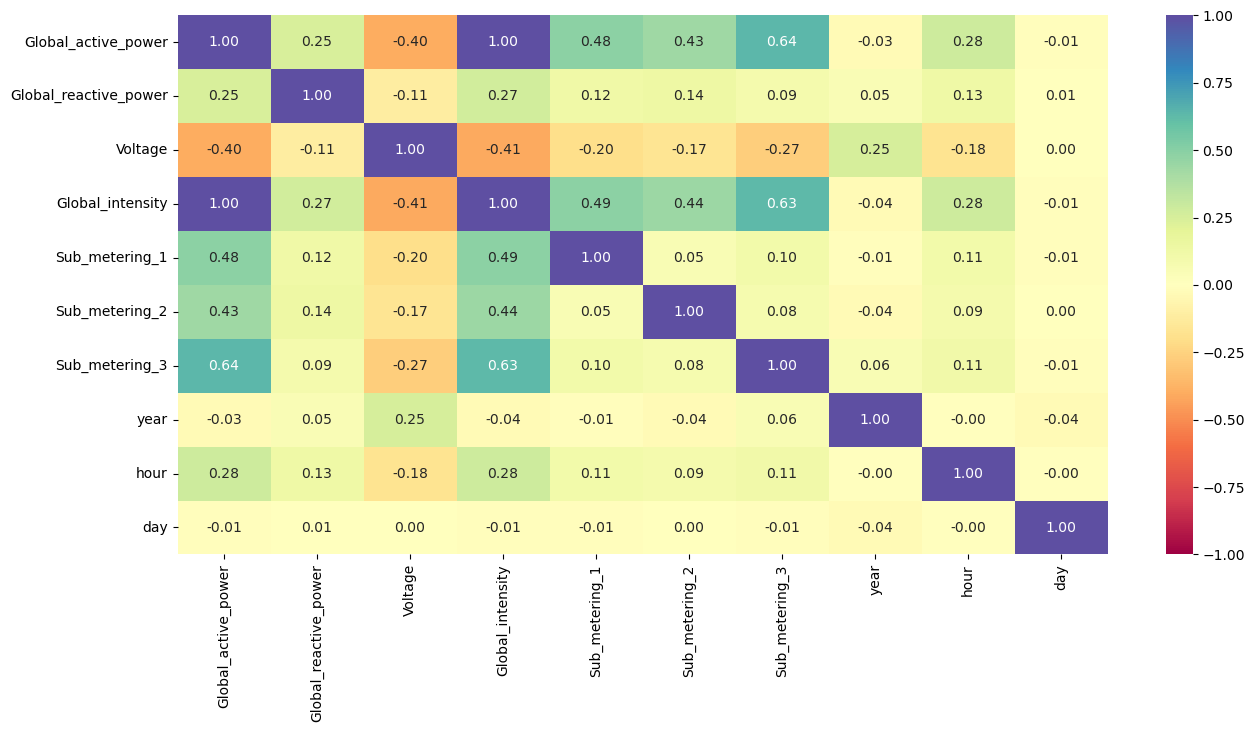

In [37]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [38]:
#sns.pairplot(data=df, hue = 'Global_active_power', diag_kind="kde")
#plt.show()

In [39]:
df = pd.read_csv('C:/Users/skothapalli/OneDrive - Tesla/Desktop/Python/Time_series_analysis/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

## Replace missing values with mean

In [40]:
# filling nan with mean in any columns
df['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean())

In [41]:
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

## Outlier

In [42]:
Q1 = df.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

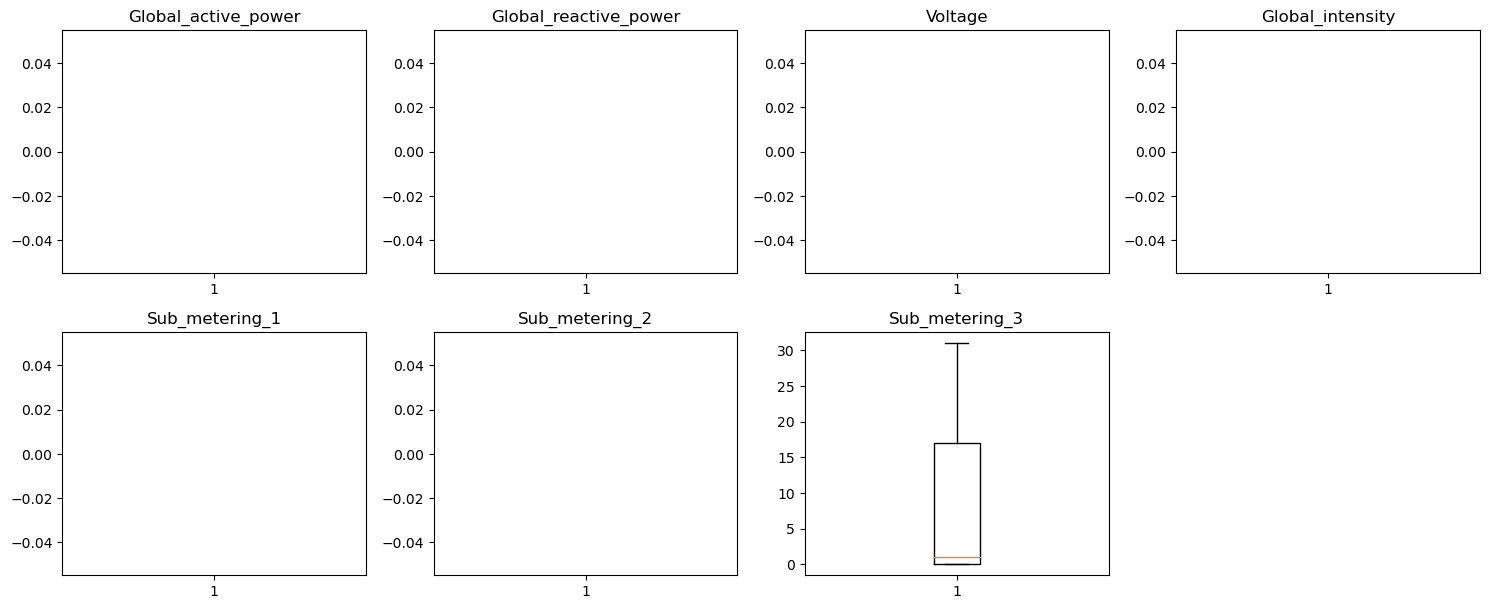

In [43]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [44]:
threshold = 3
outlier = {}
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Global_active_power : [4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.264, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 4.266, 

### Global active power

In [45]:
df['Global_active_power'].resample('M').sum()

dt
2006-12-31    41813.282
2007-01-31    69011.862
2007-02-28    56488.886
2007-03-31    58862.192
2007-04-30    35181.466
2007-05-31    44008.872
2007-06-30    35682.828
2007-07-31    29703.830
2007-08-31    34096.460
2007-09-30    41872.606
2007-10-31    49276.370
2007-11-30    55918.644
2007-12-31    72604.170
2008-01-31    65169.382
2008-02-29    49331.072
2008-03-31    55590.594
2008-04-30    48209.992
2008-05-31    45721.860
2008-06-30    42943.972
2008-07-31    35477.418
2008-08-31    12341.880
2008-09-30    42667.792
2008-10-31    50696.460
2008-11-30    59908.760
2008-12-31    56833.912
2009-01-31    62950.008
2009-02-28    50222.090
2009-03-31    54758.986
2009-04-30    49275.524
2009-05-31    45209.830
2009-06-30    33541.980
2009-07-31    27590.444
2009-08-31    29076.404
2009-09-30    42628.564
2009-10-31    51088.720
2009-11-30    55067.642
2009-12-31    60905.006
2010-01-31    59379.658
2010-02-28    55471.706
2010-03-31    48155.898
2010-04-30    44378.124
2010-05-31   

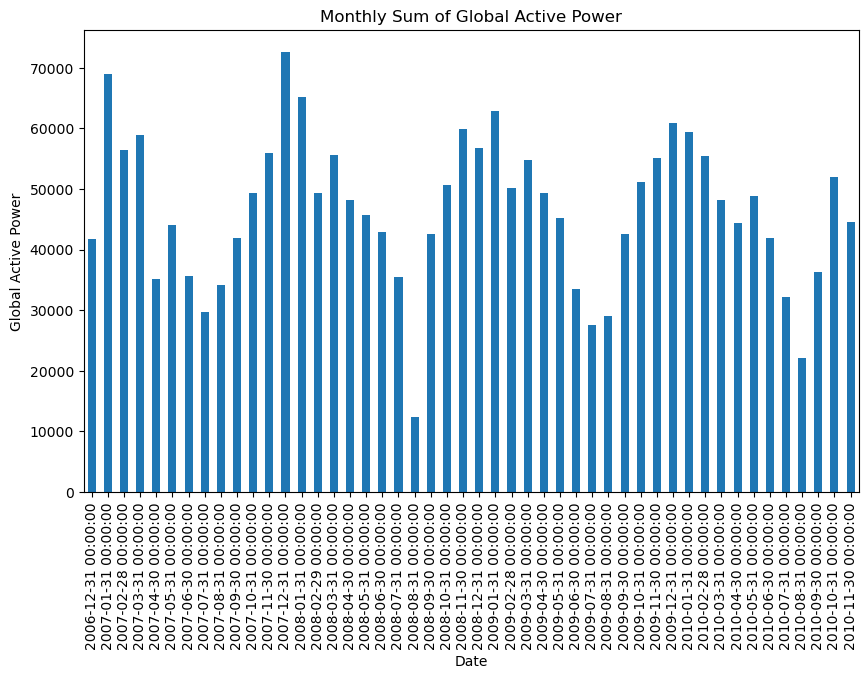

In [46]:
# Plot the histogram bar plot
df['Global_active_power'].resample('M').sum().plot(kind='bar', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Monthly Sum of Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power')

# Show the plot
plt.show()

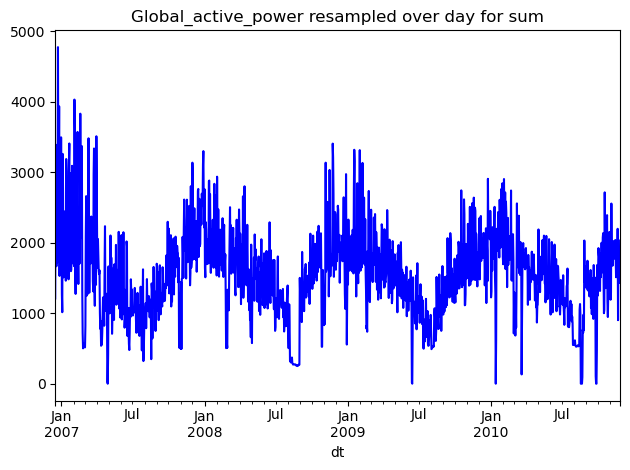

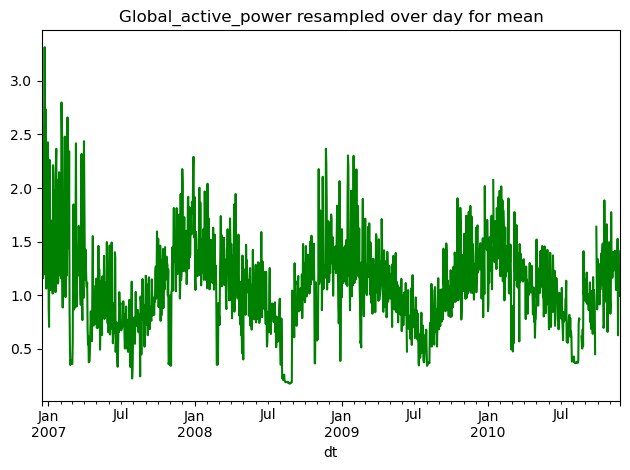

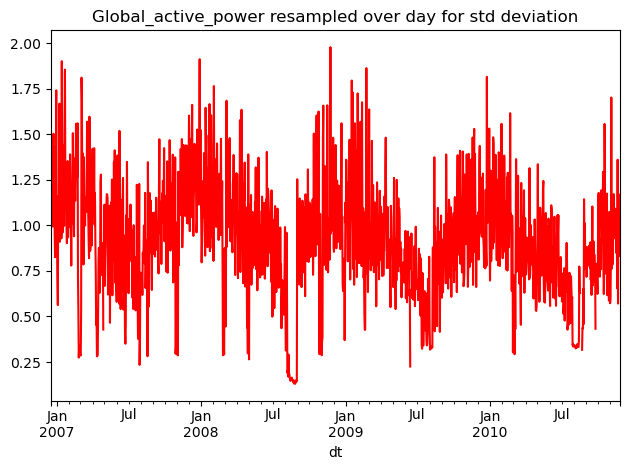

In [47]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum', color = 'blue')  
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='green') 
plt.tight_layout()
plt.show()

df.Global_active_power.resample('D').std().plot(title='Global_active_power resampled over day for std deviation', color='red') 
plt.tight_layout()
plt.show()

### Global reactive power

In [48]:
df['Global_reactive_power'].resample('M').sum()

dt
2006-12-31    2889.436
2007-01-31    5922.396
2007-02-28    4581.608
2007-03-31    5122.184
2007-04-30    4688.994
2007-05-31    5148.894
2007-06-30    6317.980
2007-07-31    5674.062
2007-08-31    5033.644
2007-09-30    5443.416
2007-10-31    4171.170
2007-11-30    4170.904
2007-12-31    4950.484
2008-01-31    3908.238
2008-02-29    3639.688
2008-03-31    4531.466
2008-04-30    5361.760
2008-05-31    6896.588
2008-06-30    6550.438
2008-07-31    6551.446
2008-08-31    5705.046
2008-09-30    5399.154
2008-10-31    4712.902
2008-11-30    4377.654
2008-12-31    4070.958
2009-01-31    4396.526
2009-02-28    3858.294
2009-03-31    4657.394
2009-04-30    5314.588
2009-05-31    5337.736
2009-06-30    5429.500
2009-07-31    7487.970
2009-08-31    8243.432
2009-09-30    6648.062
2009-10-31    5866.398
2009-11-30    5473.938
2009-12-31    5791.888
2010-01-31    5196.072
2010-02-28    4130.218
2010-03-31    5328.960
2010-04-30    5393.432
2010-05-31    5454.214
2010-06-30    6484.718
2010-07-

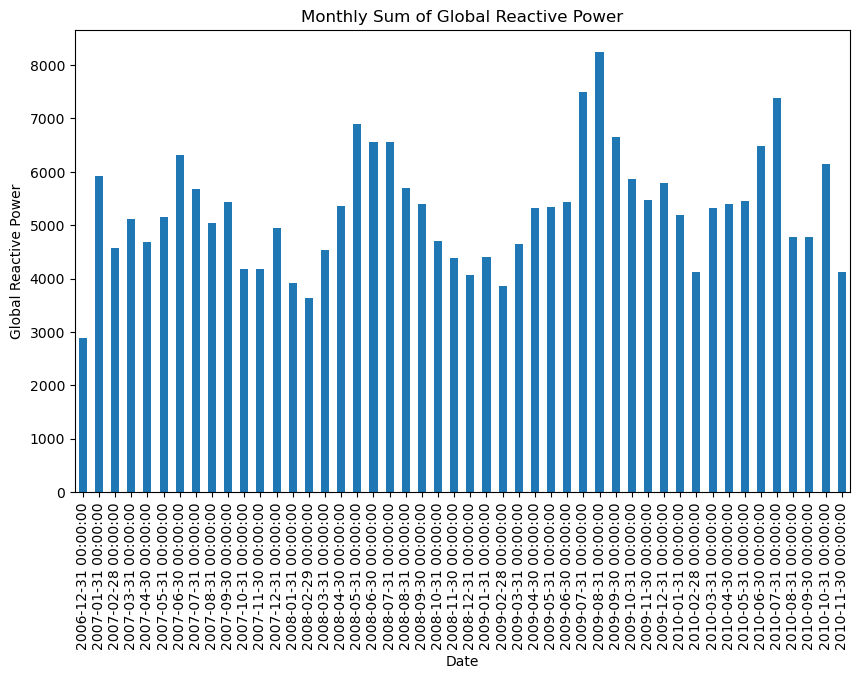

In [49]:
# Plot the histogram bar plot
df['Global_reactive_power'].resample('M').sum().plot(kind='bar', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Monthly Sum of Global Reactive Power')
plt.xlabel('Date')
plt.ylabel('Global Reactive Power')

# Show the plot
plt.show()

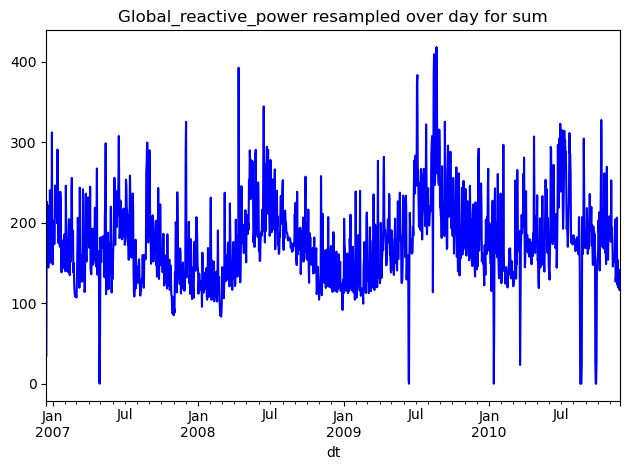

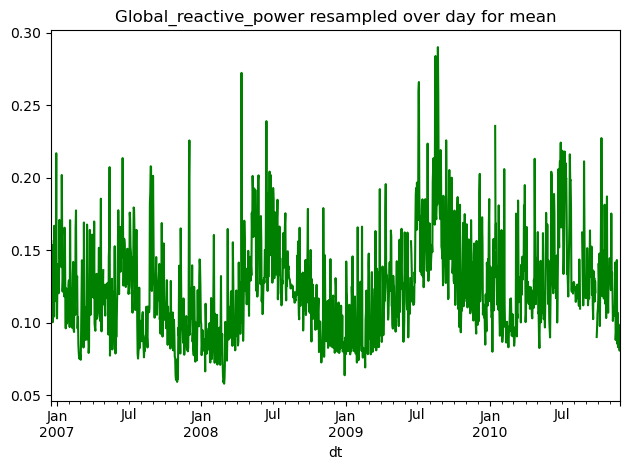

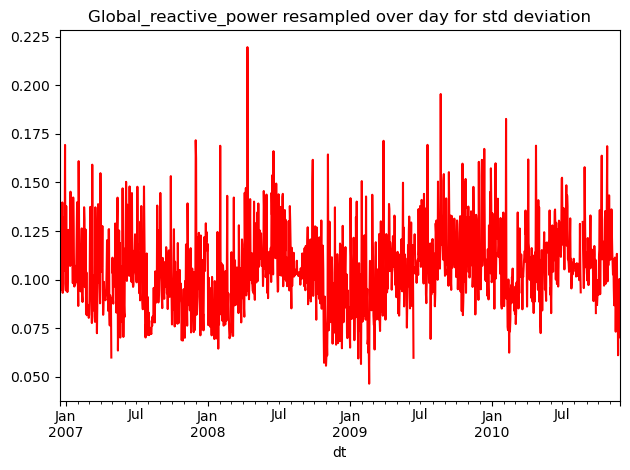

In [50]:
df.Global_reactive_power.resample('D').sum().plot(title='Global_reactive_power resampled over day for sum', color = 'blue')  
plt.tight_layout()
plt.show()   

df.Global_reactive_power.resample('D').mean().plot(title='Global_reactive_power resampled over day for mean', color='green') 
plt.tight_layout()
plt.show()

df.Global_reactive_power.resample('D').std().plot(title='Global_reactive_power resampled over day for std deviation', color='red') 
plt.tight_layout()
plt.show()

### Global intensity

In [51]:
df['Global_intensity'].resample('M').sum()

dt
2006-12-31    176594.8
2007-01-31    292241.2
2007-02-28    238463.6
2007-03-31    248772.2
2007-04-30    151026.2
2007-05-31    191838.8
2007-06-30    155518.4
2007-07-31    131040.4
2007-08-31    147804.6
2007-09-30    180334.8
2007-10-31    208779.8
2007-11-30    235253.8
2007-12-31    304418.2
2008-01-31    275945.6
2008-02-29    207710.2
2008-03-31    233677.6
2008-04-30    202913.0
2008-05-31    195697.2
2008-06-30    185819.0
2008-07-31    154611.8
2008-08-31     56403.2
2008-09-30    181973.4
2008-10-31    213963.0
2008-11-30    253310.8
2008-12-31    236433.6
2009-01-31    261900.2
2009-02-28    209344.2
2009-03-31    229840.0
2009-04-30    208064.8
2009-05-31    191944.2
2009-06-30    143932.2
2009-07-31    120976.4
2009-08-31    128391.8
2009-09-30    181977.2
2009-10-31    215103.0
2009-11-30    230421.0
2009-12-31    252730.0
2010-01-31    246799.2
2010-02-28    230447.2
2010-03-31    201565.0
2010-04-30    185980.0
2010-05-31    206717.4
2010-06-30    180102.2
2010-07-

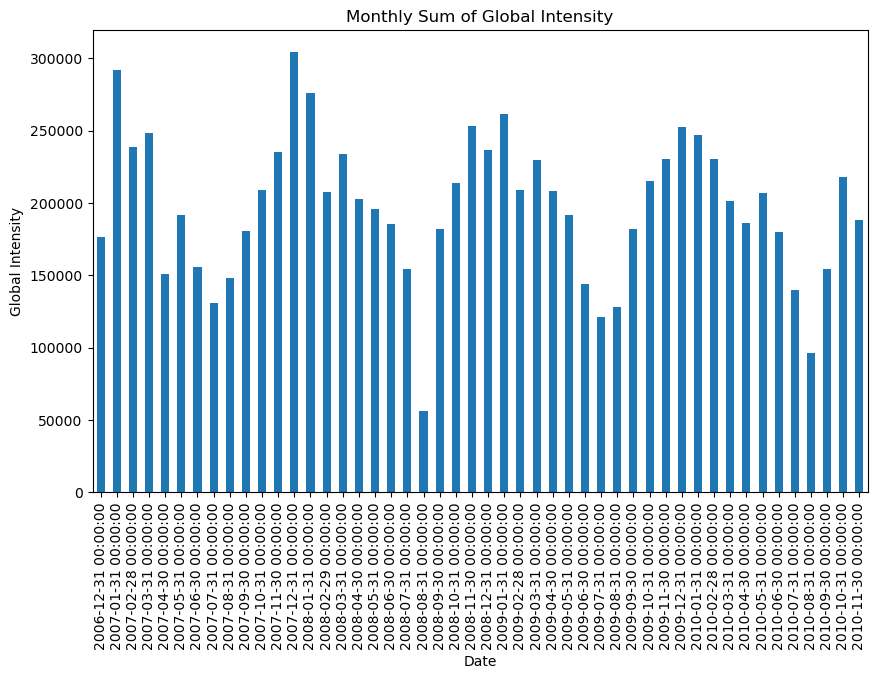

In [52]:
import matplotlib.pyplot as plt

# Plot the histogram bar plot
df['Global_intensity'].resample('M').sum().plot(kind='bar', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Monthly Sum of Global Intensity')
plt.xlabel('Date')
plt.ylabel('Global Intensity')

# Show the plot
plt.show()

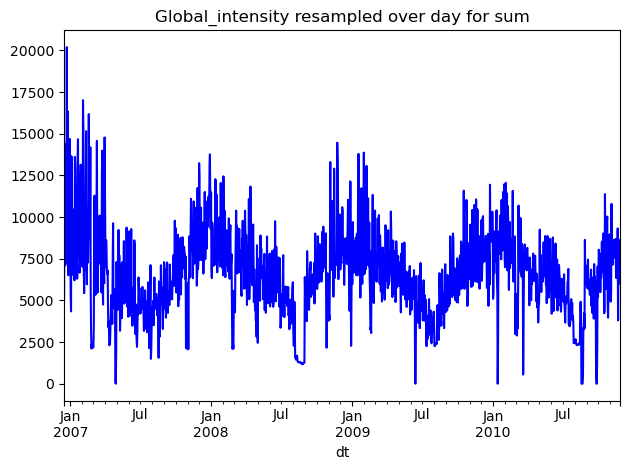

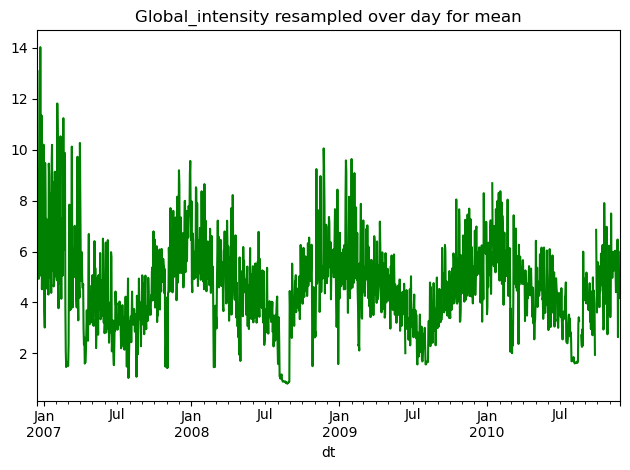

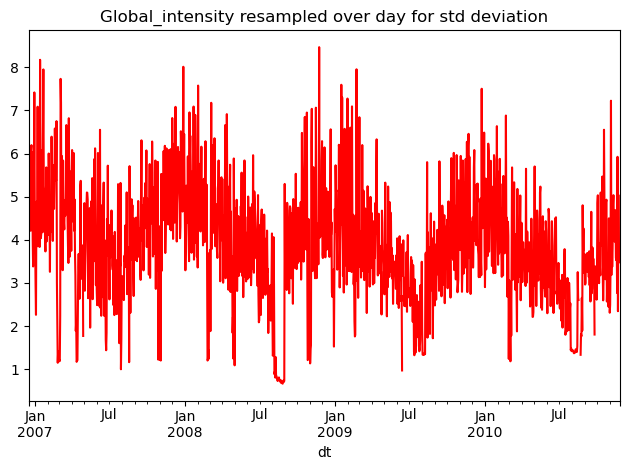

In [53]:
 df.Global_intensity.resample('D').sum().plot(title='Global_intensity resampled over day for sum', color = 'blue')  
plt.tight_layout()
plt.show()   

df.Global_intensity.resample('D').mean().plot(title='Global_intensity resampled over day for mean', color='green') 
plt.tight_layout()
plt.show()

df.Global_intensity.resample('D').std().plot(title='Global_intensity resampled over day for std deviation', color='red') 
plt.tight_layout()
plt.show()

### Voltage

In [54]:
df['Voltage'].resample('M').sum()

dt
2006-12-31     5309773.22
2007-01-31    10753521.91
2007-02-28     9697260.78
2007-03-31    10736280.75
2007-04-30     9450794.83
2007-05-31    10498362.16
2007-06-30    10309151.25
2007-07-31    10578509.55
2007-08-31    10616283.84
2007-09-30    10342642.60
2007-10-31    10700881.41
2007-11-30    10405070.38
2007-12-31    10790396.33
2008-01-31    10742211.50
2008-02-29    10046857.96
2008-03-31    10772523.43
2008-04-30    10420755.46
2008-05-31    10729543.15
2008-06-30    10323489.14
2008-07-31    10702890.14
2008-08-31    10732450.56
2008-09-30    10373381.89
2008-10-31    10717968.88
2008-11-30    10391188.27
2008-12-31    10834008.18
2009-01-31    10882685.36
2009-02-28     9758014.49
2009-03-31    10815949.79
2009-04-30    10438073.71
2009-05-31    10717942.42
2009-06-30     9616389.45
2009-07-31    10802709.17
2009-08-31    10555310.81
2009-09-30    10416803.52
2009-10-31    10753273.24
2009-11-30    10451851.03
2009-12-31    10895351.04
2010-01-31    10105594.77
2010-02-2

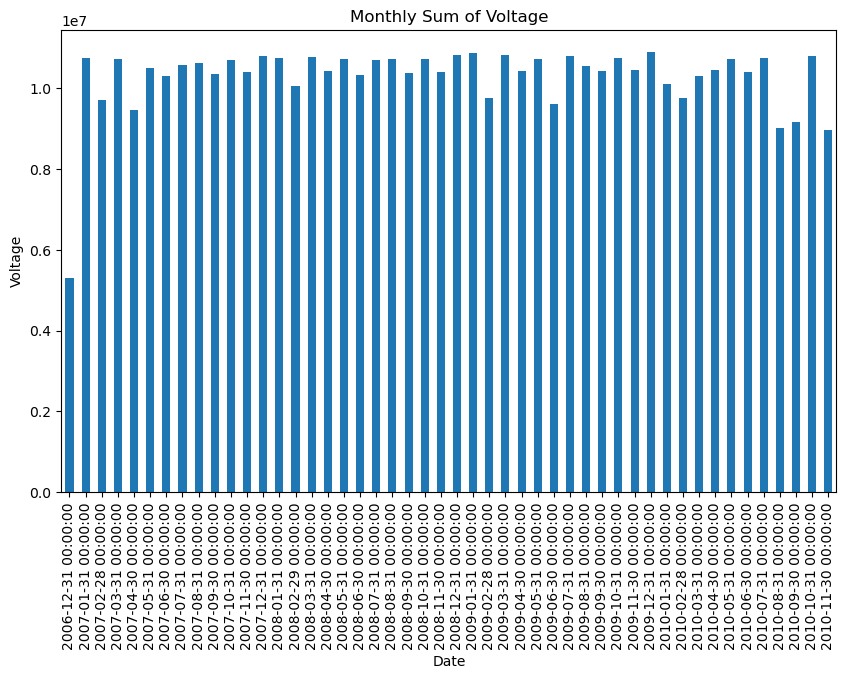

In [55]:
# Plot the histogram bar plot
df['Voltage'].resample('M').sum().plot(kind='bar', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Monthly Sum of Voltage')
plt.xlabel('Date')
plt.ylabel('Voltage')

# Show the plot
plt.show()


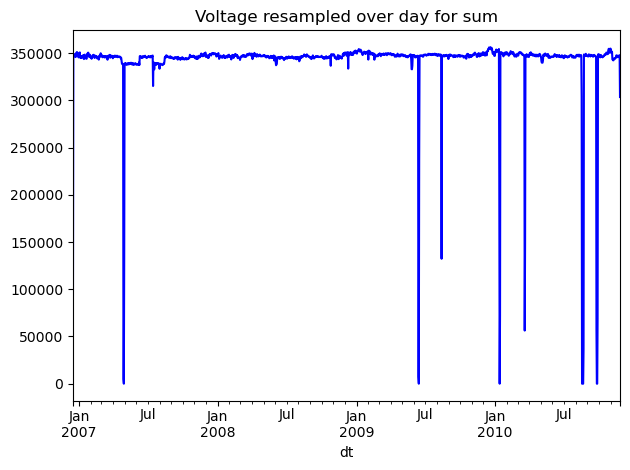

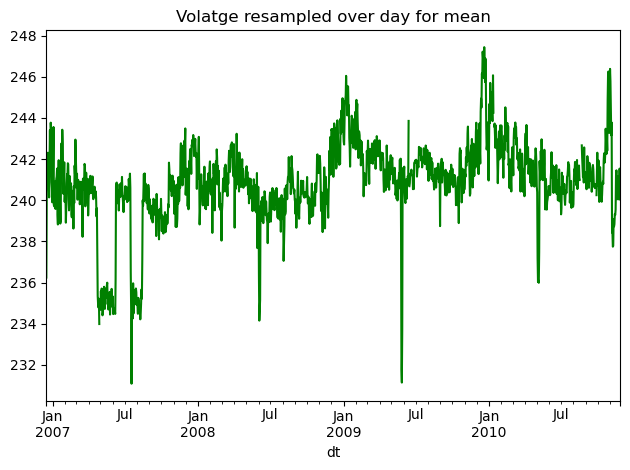

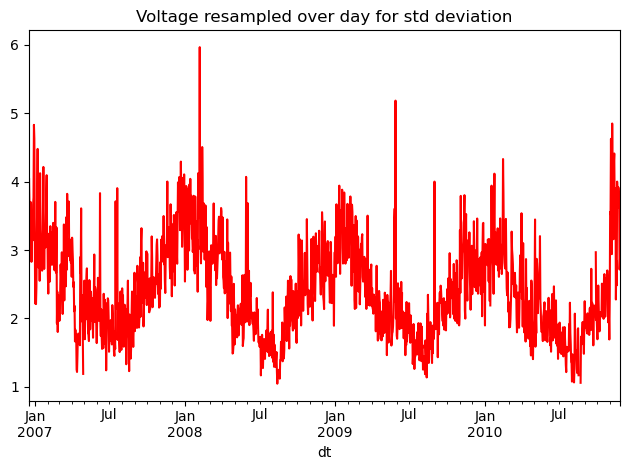

In [56]:
df.Voltage.resample('D').sum().plot(title='Voltage resampled over day for sum', color = 'blue')  
plt.tight_layout()
plt.show()   

df.Voltage.resample('D').mean().plot(title='Volatge resampled over day for mean', color='green') 
plt.tight_layout()
plt.show()

df.Voltage.resample('D').std().plot(title='Voltage resampled over day for std deviation', color='red') 
plt.tight_layout()
plt.show()

## Reasmpling the dataset

In [57]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [58]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [59]:
df_resample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [60]:
df_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34168 non-null  float64
 1   Global_reactive_power  34168 non-null  float64
 2   Voltage                34168 non-null  float64
 3   Global_intensity       34168 non-null  float64
 4   Sub_metering_1         34168 non-null  float64
 5   Sub_metering_2         34168 non-null  float64
 6   Sub_metering_3         34589 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


## Normalization

In [61]:
## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


In [62]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [63]:
print(train_X.shape)
print(train_y.shape) 
print(test_X.shape)
print(test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7)
(8760,)
(25399, 1, 7)
(25399,)


## Model#1

In [64]:
model= Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(70))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [65]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            43200     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 70)                47880     
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 dense (Dense)               (None, 1)                 71        
                                                                 
Total params: 91,151
Trainable params: 91,151
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
# fit network
history= model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
126/126 - 6s - loss: 0.0213 - val_loss: 0.0109 - 6s/epoch - 44ms/step
Epoch 2/20
126/126 - 3s - loss: 0.0122 - val_loss: 0.0099 - 3s/epoch - 20ms/step
Epoch 3/20
126/126 - 3s - loss: 0.0113 - val_loss: 0.0093 - 3s/epoch - 20ms/step
Epoch 4/20
126/126 - 2s - loss: 0.0109 - val_loss: 0.0095 - 2s/epoch - 20ms/step
Epoch 5/20
126/126 - 2s - loss: 0.0109 - val_loss: 0.0093 - 2s/epoch - 18ms/step
Epoch 6/20
126/126 - 2s - loss: 0.0109 - val_loss: 0.0093 - 2s/epoch - 19ms/step
Epoch 7/20
126/126 - 3s - loss: 0.0109 - val_loss: 0.0094 - 3s/epoch - 20ms/step
Epoch 8/20
126/126 - 2s - loss: 0.0108 - val_loss: 0.0093 - 2s/epoch - 19ms/step
Epoch 9/20
126/126 - 3s - loss: 0.0106 - val_loss: 0.0093 - 3s/epoch - 21ms/step
Epoch 10/20
126/126 - 2s - loss: 0.0108 - val_loss: 0.0093 - 2s/epoch - 19ms/step
Epoch 11/20
126/126 - 2s - loss: 0.0107 - val_loss: 0.0093 - 2s/epoch - 18ms/step
Epoch 12/20
126/126 - 2s - loss: 0.0107 - val_loss: 0.0092 - 2s/epoch - 15ms/step
Epoch 13/20
126/126 - 2s 

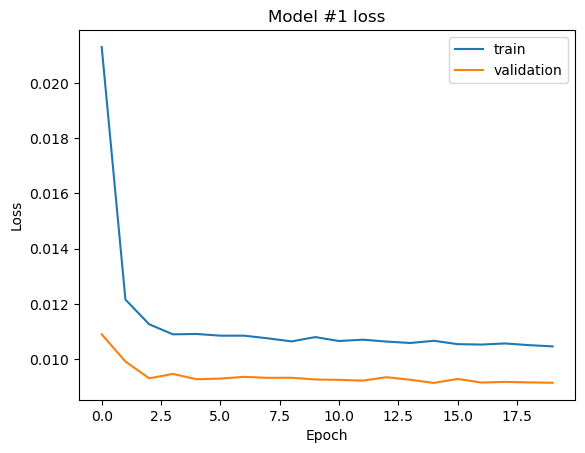

In [67]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model #1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [68]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))

794/794 [==============================] - 3s 2ms/step


In [69]:
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [70]:
def evaluate_model(y_true, y_pred, n_features):
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate R-squared
    r2 = r2_score(y_true, y_pred)

    # Calculate Adjusted R-squared
    n = len(y_true)
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - n_features - 1)

    return rmse, mae, r2, adj_r2

In [73]:
# Calculate evaluation metrics for Model 1
rmse, mae, r2, adj_r2 = evaluate_model(test_y, inv_yhat, n_features=7)

# Create a DataFrame with the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['Model 1'],
    'RMSE': [rmse],
    'MAE': [mae],
    'R-squared': [r2],
    'Adj. R-squared': [adj_r2]
})

metrics_df.head()

,Model,RMSE,MAE,R-squared,Adj. R-squared
0,Model 1,1.23338,1.089601,-84.926262,-84.94995
